t = 21.32 s: 38.3963 °, t = 134.33 s: 39.9524 °, t = 287.85 s: 39.9564 °, t = 530.92 s: 39.9631 °, t = 752.67 s: 39.9721 °
Erro Quadrático Médio (MSE) entre a solução analítica e a calculada: 0.2866549482534304


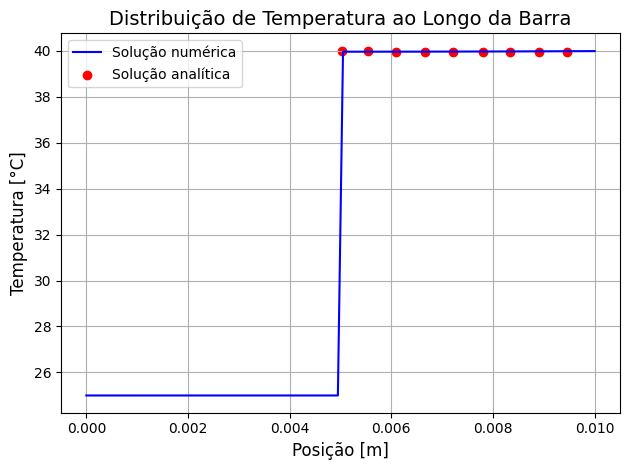

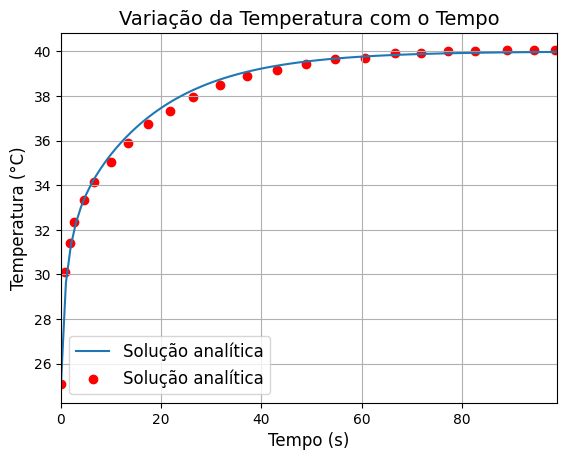

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import interp1d

def TDMASolve(a, b, c, d):
    a = a.astype('double')
    b = b.astype('double')
    c = c.astype('double')
    d = d.astype('double')
    n = len(d)#n em números é linhas
    nmax=n
    x=np.zeros(n)
# Modifica o primeiro coeficiente de cada linha
    c[0] /= b[0] #Risco de divisão por zero.
    d[0] /= b[0]

    for i in range(1, nmax):
        ptemp = b[i] - (a[i] * c[i-1])
        c[i] /= ptemp
        d[i] = (d[i] - a[i] * d[i-1])/ptemp

#Substituição de volta
    # x = [0 for i in range(nmax)]
    x[-1] = d[-1]
    for i in range(-2,-nmax-1,-1):
        x[i] = d[i] - c[i] * x[i+1]
    return x

#entrada
alfa2=1.26e-6
alfa1=4e-7
k1=0.027
k2=0.24
L1=0.005
L2=0.005
T0=25
TL1=25
TL2=30
h1=100
h2=100
hc = 1e-4
#malha
N=100
M=100
x=np.linspace(0,L1+L2,N)
dx=x[1]-x[0]
dt=1
q0=1000
#------------alocacao de vetores e matrizes
temp=np.empty((M,N))
Ap=np.empty(N)
Ae=np.empty(N)
Aw=np.empty(N)
Afonte=np.empty(N)
temp[0,:]=T0*np.ones(N)
tempo=np.empty(M)
tempo[0]=0
#--------------------------------------
A=(alfa1*dt)/dx
B=1/dx
C=h1/k1
D=(alfa2*dt)/dx
E=h2/k2
F=q0/k2
####################################
for j in range(1,M): # loop do tempo

    tempo[j]=dt*j ## t=k*dt
    #x=0
    Ap[0]=1+A*B+A*C
    Ae[0]=-A*B
    Aw[0]=0
    Afonte[0]=A*C*TL1 + temp[j-1,0]

    for i in range(1,N-1):  # dominio
      if i<int((N-1)/2):
        Ap[i]=1+2*A*B
        Ae[i]=-A*B
        Aw[i]=-A*B
        Afonte[i]=temp[j-1,i]
      elif i==int((N-1)/2):
        Ap[i]=k1/dx
        Ae[i]=-hc
        Aw[i]=hc-k1/dx
        Afonte[i]=0
      elif i==N/2:
        Ap[i]=k2/dx
        Ae[i]=hc-k2/dx
        Aw[i]=-hc
        Afonte[i]=0
      else:
        Ap[i]=1+2*D*B
        Ae[i]=-D*B
        Aw[i]=-D*B
        Afonte[i]=temp[j-1,i]

# x=L
    Ap[N-1]=1+D*B+D*E
    Ae[N-1]=0
    Aw[N-1]=-D*B
    Afonte[N-1]=D*E*TL2 + temp[j-1,N-1] + D*F

    temp[j,:]=TDMASolve(Aw, Ap, Ae, Afonte)

x1_values = [
    5.04E-03, 5.5385E-03, 6.1026E-03, 6.6667E-03, 7.2051E-03,
    7.7949E-03, 8.3333E-03, 8.8974E-03, 9.4615E-03
]

y1_values = [
    4.0000E+01, 3.9996E+01, 3.9932E+01, 3.9932E+01, 3.9932E+01,
    3.9932E+01, 3.9932E+01, 3.9932E+01, 3.9932E+01
]
x2_values = [
    0.0000E+00, 7.6923E-01, 1.7949E+00, 2.5641E+00, 4.6154E+00,
    6.6667E+00, 1.0000E+01, 1.3333E+01, 1.7436E+01, 2.1795E+01,
    2.6410E+01, 3.1795E+01, 3.7179E+01, 4.3077E+01, 4.8974E+01,
    5.4615E+01, 6.0769E+01, 6.6667E+01, 7.1795E+01, 7.7179E+01,
    8.2564E+01, 8.8974E+01, 9.4359E+01, 9.8718E+01
]

y2_values = [
    2.5068E+01, 3.0114E+01, 3.1409E+01, 3.2364E+01, 3.3318E+01,
    3.4136E+01, 3.5023E+01, 3.5909E+01, 3.6727E+01, 3.7341E+01,
    3.7955E+01, 3.8500E+01, 3.8909E+01, 3.9182E+01, 3.9455E+01,
    3.9659E+01, 3.9727E+01, 3.9932E+01, 3.9932E+01, 4.0000E+01,
    4.0000E+01, 4.0068E+01, 4.0068E+01, 4.0068E+01
]

plt.figure(1)
plt.plot(x, temp[-1, :],  color='b', label="Solução numérica")
plt.scatter(x1_values, y1_values, marker='o', color='r', label="Solução analítica")
# Configurações do gráfico
plt.xlabel('Posição [m]', fontsize=12)
plt.ylabel('Temperatura [°C]', fontsize=12)
plt.title('Distribuição de Temperatura ao Longo da Barra', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show

plt.figure(2)
position_index = np.argmin(np.abs(x - L1))
plt.plot(tempo, temp[:, -1], label = "Solução analítica")
plt.scatter(x2_values, y2_values, marker='o', color='r', label="Solução analítica")
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title('Variação da Temperatura com o Tempo', fontsize=14)
plt.grid(True)
ax = plt.gca()  # Obter o objeto do eixo atual
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.legend(fontsize=12)
plt.xlim(0, dt * (M - 1))

f = interp1d(x, temp[-1, :], kind='linear')
T_21_32 = f(5.04E-03)
T_134_33 = f(6.1026E-03)
T_287_85 = f(7.2051E-03)
T_530_92 = f(8.3333E-03)
T_752_67 = f(9.4615E-03)
print(f"t = 21.32 s: {T_21_32:.4f} °, t = 134.33 s: {T_134_33:.4f} °, t = 287.85 s: {T_287_85:.4f} °, t = 530.92 s: {T_530_92:.4f} °, t = 752.67 s: {T_752_67:.4f} °")

from sklearn.metrics import mean_squared_error

# Interpolate the calculated temperature values to match the y_value points
from scipy.interpolate import interp1d

# Assuming the last time step contains the steady-state solution
calculated_temp_at_last_timestep = temp[-1, :]
f_mse = interp1d(x, calculated_temp_at_last_timestep, kind='linear')
interpolated_calculated_temps = f_mse(x1_values)

# Calculate the Mean Squared Error
mse = mean_squared_error(y1_values, interpolated_calculated_temps)

print(f"Erro Quadrático Médio (MSE) entre a solução analítica e a calculada: {mse}")

#plt.figure(3)
#plt.imshow(temp.T, aspect='auto', origin='lower', extent=[0, dt * M, 0, L1+L2], cmap='hot')
#plt.colorbar(label='Temperatura (°C)')
#plt.xlabel('Tempo')
#plt.ylabel('Posição no Domínio')
#plt.title('Distribuição da Temperatura ao Longo do Tempo e do Espaço')
#plt.show()